# Try This Exercise

In this exercise, you will compare the performance of `k-means` and `Gaussian Mixture Model` for the simulated 2-dimensional data in `gmm_kmeans_test_data.dat`.  

 1. Read in the data and plot.
 2. Perform a k-means cluster analysis on the data.  
    - You may assume there are four clusters present. 
    - Plot the resulting cluster assignments, along with the cluster centers.
    - Verify (or check) whether four clusters is the optimal number of clusters (based on a variance plot.
 3. Perform a gaussian mixture model analysis on the data set.  
    - You may again assume there are four clusters present.
    - Plot the resulting cluster assignments along with the cluster centers.
    - Verify (or check) whether four clusters is the optimal number of clusters.
 4. Which cluster method do you think performs better for these data?

In [35]:
# Initilize Python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 12
figsize = (3,3)
dpi = 220
# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


______________

### 1)

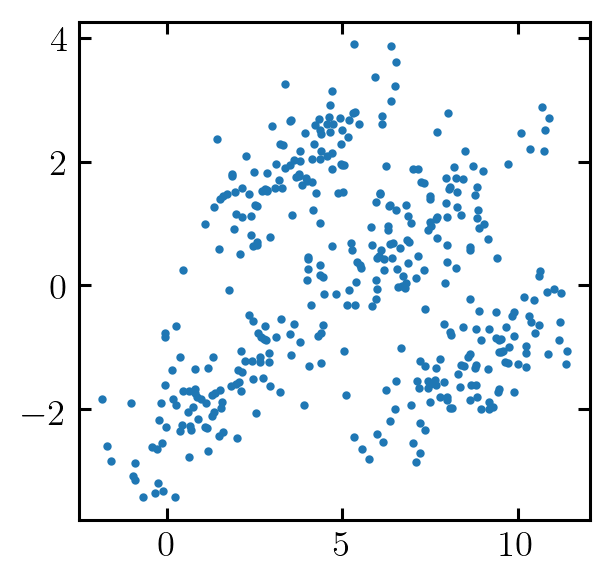

In [36]:

# Read in and plot the data
data1, data2 = np.loadtxt('gmm_kmeans_test_data.dat',unpack = True)

plt.scatter(data1,data2, s = 3)

___________

### 2.
Now we can run the cluster analysis. We'll assume four clusters:

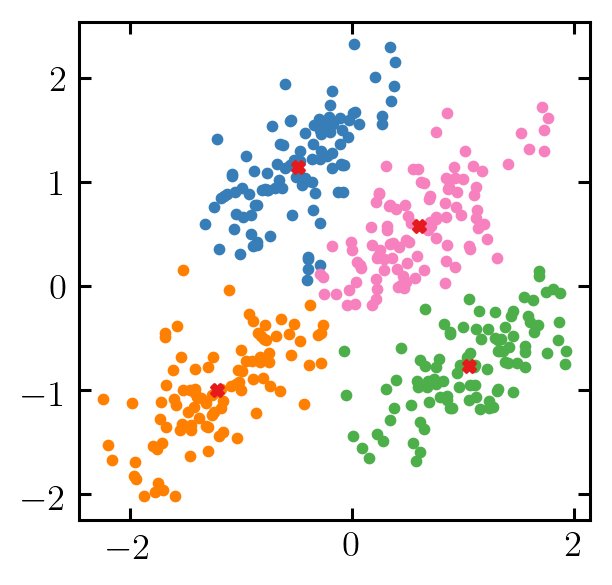

In [37]:
# Scale the data
data1 = (data1-np.mean(data1)) / np.std(data1)
data2 = (data2-np.mean(data2)) / np.std(data2)

from scipy.cluster.vq import kmeans,vq

#Input data must have particular shape:
temp=np.vstack((data1, data2))
properties=temp.T

def get_mean(properties):
    numproperties=properties.shape[1]
    tempmean=np.zeros(numproperties)
    for i in range(numproperties):
        tempmean[i]=properties[:,i].mean()
    return tempmean

def get_total_variance(properties,tempmean):
    numproperties=properties.shape[1]
    tempvariance=np.zeros(numproperties)
    for i in range(numproperties):
        tempvariance[i]=((properties[:,i]-tempmean[i])**2).sum()
    return tempvariance.sum()

global_mean=get_mean(properties)

global_variance=get_total_variance(properties,global_mean)


# Assign clusters 
centroids,_ = kmeans(properties,4) # Four clusters
idx,_ = vq(properties,centroids) # Assigns cluster membership (4 options)

# Plot


CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

for i in range(0,4):
    plt.scatter(data1[idx == i], data2[idx == i], color = CB_color_cycle[i], s = 8)
    plt.scatter(centroids[i][0],centroids[i][1],marker = 'X', s = 20, color = CB_color_cycle[7])



A quick Elbow-plot as a sanity check on our number of clusters:

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
The number of clusters is  2
The total variance is  469.6939684328396
The number of clusters is  3
The total variance is  238.92451361909886
The number of clusters is  4
The total variance is  165.80539052517707
The number of clusters is  5
The total variance is  134.4875740937962
The number of clusters is  6
The total variance is  113.03878350390664
The number of clusters is  7
The total variance is  91.77980562361994
The number of clusters is  8
The total variance is  72.25318149694223
The number of clusters is  9
The total variance is  65.5591886205835
The number of clusters is  10
The total variance is  59.71175567237198


Text(0, 0.5, 'Fraction of Variance Explained')

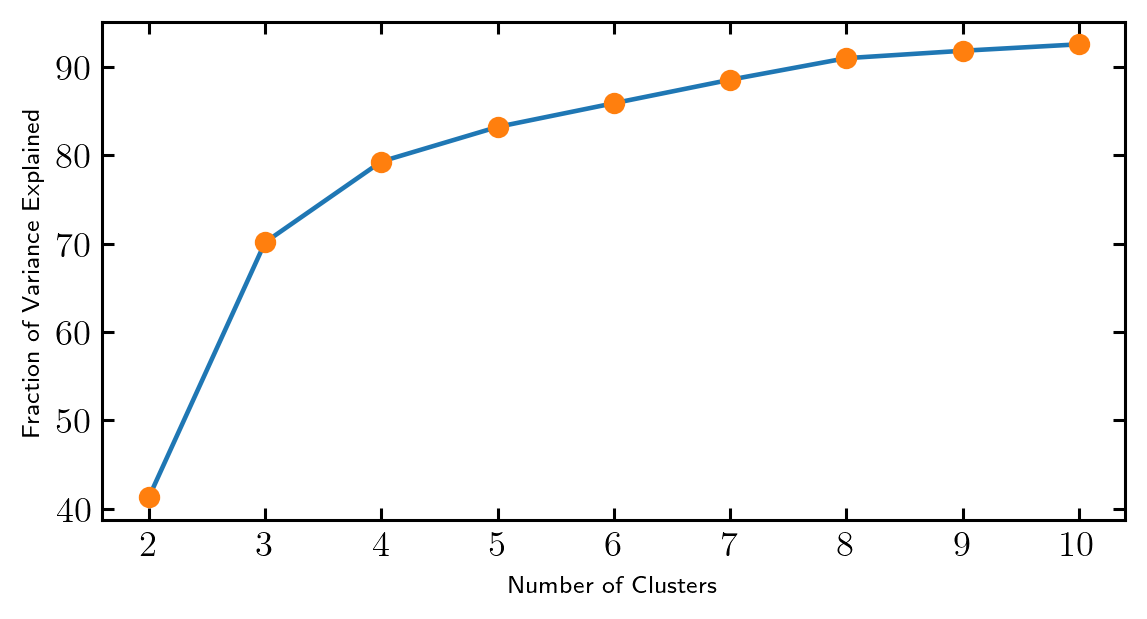

In [42]:
# Cycle through number of clusters:
numclusters=np.linspace(2,10,9)
print (numclusters)
cluster_variance=np.zeros(numclusters.shape[0])

# for each number of clusters, run the k-means, then get the variance for each 
for i in (numclusters):
    current_num_clusters=np.int(i)
    print ('The number of clusters is ',current_num_clusters)
    centroids,_ = kmeans(properties,current_num_clusters)
    idx,_ = vq(properties,centroids)
    temp_cluster_variance=np.zeros(current_num_clusters)
    for j in range(np.int(i)):
        temp_cluster_variance[j]=get_total_variance(properties[idx==j,:],centroids[j])
#       print (temp_cluster_variance.shape,temp_cluster_variance[j])
    cluster_variance[np.int(i)-2]=temp_cluster_variance.sum()
    print ('The total variance is ',temp_cluster_variance.sum())


# Plot
plt.figure(figsize = [6,3])
plt.plot(numclusters,(global_variance-cluster_variance)*100/global_variance)
plt.plot(numclusters,(global_variance-cluster_variance)*100/global_variance,'o')

plt.xlabel('Number of Clusters', fontsize = 8)
plt.ylabel('Fraction of Variance Explained', fontsize = 8)

After 4 clusters, the slope drops to a near constant level suggesting we made a resonable guess.

___________
### 3.
Preform a Gaussian Mixture Model analysis.

In [44]:
#Input data must have particular shape:
temp=np.vstack((data1, data2))
properties=temp.T
print (properties.shape)


(400, 2)


Since we're assuming four clusters, we'll create a gaussian mixture instance with 4 components:

In [49]:
from sklearn.mixture import GaussianMixture

# create the gaussian mixture instance
gmm_model = GaussianMixture(n_components=4,n_init=10,max_iter=100)

# apply to the data
result=gmm_model.fit(properties)

means=result.means_
covariance=result.covariances_
weights=result.weights_


# Predict the labels for the data samples in X using trained model.
# There are N values assigning the data to one of each of the three 
# gaussians (i.e., the values are 0, 1, or 2).
predicted=result.predict(properties)

# Compute the weighted log probabilities for each sample.
score_samples=result.score_samples(properties)

# Predict posterior probability of each component given the data.
responsibilities=result.predict_proba(properties)



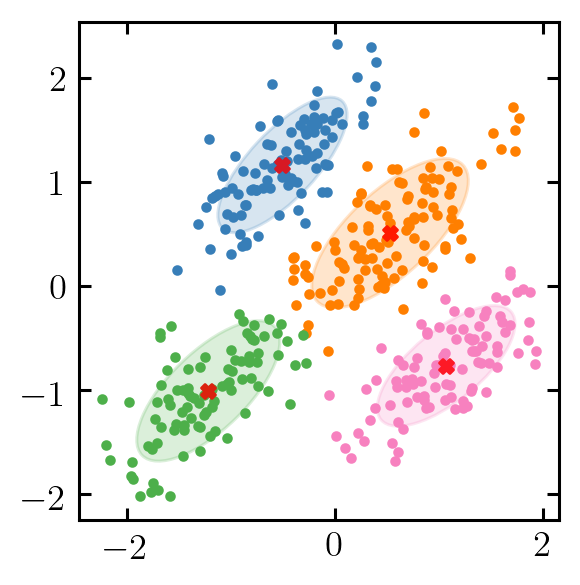

In [64]:
# Plot
from matplotlib.patches import Ellipse

a = plt.subplot(111, aspect='equal')

def get_ellipse_info(covarsub):
    v, w = np.linalg.eigh(covarsub)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    return v,angle


for i in range(0,4):
    # Data
    plt.scatter(properties[predicted==i,0],properties[predicted==i,1], s = 6, color = CB_color_cycle[i])
    plt.scatter(means[i,0],means[i,1],marker = 'X', color = 'red', s = 20)
    
    # Ellipses
    covsub=covariance[i,:,:]
    meanssub=means[i,:]
    v,angle=get_ellipse_info(covsub)
    ell = mpl.patches.Ellipse(meanssub, v[0], v[1],180 + angle, color=CB_color_cycle[i])
    ell.set_clip_box(a.bbox)
    ell.set_alpha(0.2)
    a.add_artist(ell)

To see if four is the ideal number of clusters, we want to check the Aikake Information Criterion (Or Bayseian Information Criterion) for different numbers of components in our Gaussian Mixture model. The model with the lowest AIC/BIC score should be the model with the ideal number of clusters:

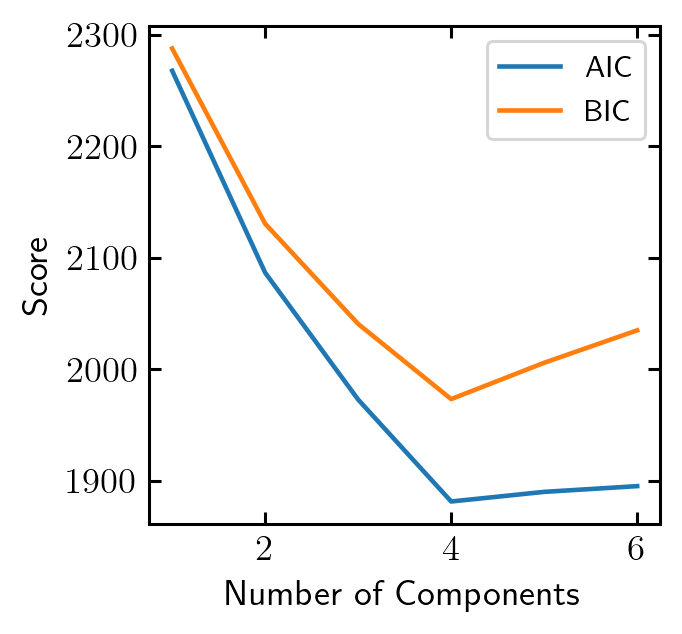

In [72]:
test_numcomponents=np.arange(6)+1


AIC_result=np.zeros(6)
BIC_result=np.zeros(6)

for i in range(6):
    gmm_temp=GaussianMixture(n_components=test_numcomponents[i],n_init=10,max_iter=100)
    result=gmm_temp.fit(properties)
    AIC_result[i]=result.aic(properties)
    BIC_result[i]=result.bic(properties)
    
# Plot
plt.plot(test_numcomponents,AIC_result, label = "AIC")
plt.plot(test_numcomponents,BIC_result, label = "BIC")

plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.legend(fontsize = 10)

Both criteria are minmized for the case of four components. We conclude that four was indeed the correct number of clusters for our data set.

_____________________________

## 4)
It's difficult to say if there's a clear winner here. Both K-means and a Gaussian-Mixture model do a good job at grouping the data into four clearly distinct sets, but on closer inspection it looks like there is slightly less overlap between the upper-left and upper central (blue and pink regions in the K-means plot; blue and orange in the GMM)in the GMM assigned clustering compared to the k-means. To me this means that GMM likely handels this data-set better.